<a href="https://colab.research.google.com/github/parthkohli92/Stock-Forecasting-Analysis/blob/main/Apple_Stock_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np 
import pandas as pd

In [4]:
df = pd.read_csv('AAPL_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=True)
df.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL


In [5]:
df= df.drop(['High','Low','Volume','Name'],axis=1)

In [6]:
df.head(10)

,Open,Close
Date,,
2006-01-03,10.34,10.68
2006-01-04,10.73,10.71
2006-01-05,10.69,10.63
2006-01-06,10.75,10.90
2006-01-09,10.96,10.86
2006-01-10,10.89,11.55
2006-01-11,11.98,11.99
2006-01-12,12.14,12.04
2006-01-13,12.14,12.23


In [7]:
df = df.drop(['Open'],axis=1)

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

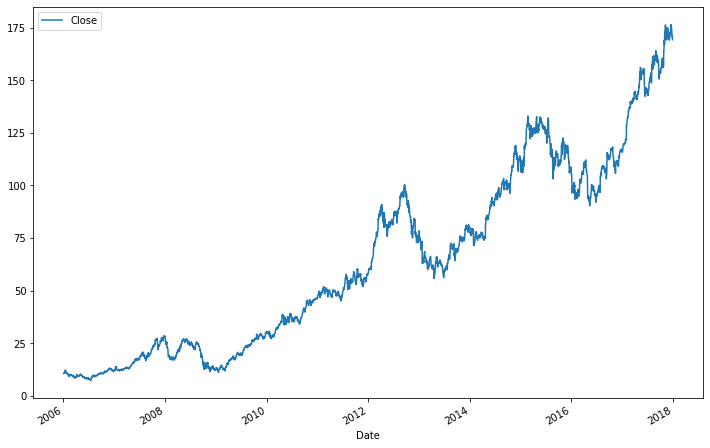

In [9]:
df.columns = ['Close']
df.plot(figsize=(12,8))

In [10]:
len(df)

3019

In [11]:
train = df.iloc[:3007]
test = df.iloc[3007:]

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [13]:
df.head(), df.tail()

(            Close
 Date             
 2006-01-03  10.68
 2006-01-04  10.71
 2006-01-05  10.63
 2006-01-06  10.90
 2006-01-09  10.86,              Close
 Date              
 2017-12-22  175.01
 2017-12-26  170.57
 2017-12-27  170.60
 2017-12-28  171.08
 2017-12-29  169.23)

In [14]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [15]:
scaled_train[:10]

array([[0.02035503],
       [0.02053254],
       [0.02005917],
       [0.0216568 ],
       [0.02142012],
       [0.02550296],
       [0.02810651],
       [0.02840237],
       [0.02952663],
       [0.0287574 ]])

In [16]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [17]:
# Define generator 
n_input = 3 
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train,length=n_input, batch_size=1)

In [18]:
print(len(scaled_train),len(generator))

3007 3004


In [19]:
X, y=generator[1]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.02053254 0.02005917 0.0216568 ]
Predict this y: 
 [[0.02142012]]


In [20]:
X, y=generator[2]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.02005917 0.0216568  0.02142012]
Predict this y: 
 [[0.02550296]]


In [21]:
# we do the same thing but now for 12months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train,length=n_input, batch_size=1)

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [23]:
# Making model 
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input,n_features)))
model.add(Dense(1))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer='adam',loss='mse')

In [26]:
# fitting the model 
model.fit(generator, epochs=50)

Epoch 1/50
2995/2995 [==============================] - 107s 35ms/step - loss: 0.0013
Epoch 2/50
2995/2995 [==============================] - 103s 34ms/step - loss: 2.8184e-04
Epoch 3/50
2995/2995 [==============================] - 103s 34ms/step - loss: 2.0180e-04
Epoch 4/50
2995/2995 [==============================] - 104s 35ms/step - loss: 1.4559e-04
Epoch 5/50
2995/2995 [==============================] - 101s 34ms/step - loss: 1.3610e-04
Epoch 6/50
2995/2995 [==============================] - 103s 34ms/step - loss: 1.1073e-04
Epoch 7/50
2995/2995 [==============================] - 104s 35ms/step - loss: 1.1184e-04
Epoch 8/50
2995/2995 [==============================] - 102s 34ms/step - loss: 1.0260e-04
Epoch 9/50
2995/2995 [==============================] - 103s 34ms/step - loss: 9.3220e-05
Epoch 10/50
2995/2995 [==============================] - 102s 34ms/step - loss: 8.8436e-05
Epoch 11/50
2995/2995 [==============================] - 102s 34ms/step - loss: 9.5228e-05
Epoch 12/50


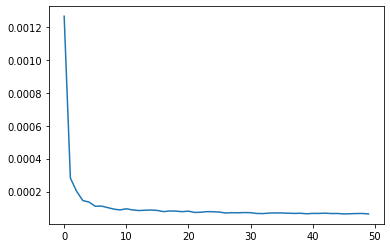

In [27]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [28]:
last_train_batch = scaled_train[-12:]

In [29]:
last_train_batch =last_train_batch.reshape((1,n_input,n_features))

In [30]:
model.predict(last_train_batch)

array([[0.9495395]], dtype=float32)

In [31]:
scaled_test[0]

array([0.97650888])

In [32]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [33]:
test_predictions[:10]

[array([0.9495395], dtype=float32),
 array([0.9284424], dtype=float32),
 array([0.9088672], dtype=float32),
 array([0.88946754], dtype=float32),
 array([0.8700623], dtype=float32),
 array([0.8506044], dtype=float32),
 array([0.83118623], dtype=float32),
 array([0.8119145], dtype=float32),
 array([0.7928851], dtype=float32),
 array([0.77399904], dtype=float32)]

In [40]:
test.head(),

(             Close  Predictions
 Date                           
 2017-12-13  172.27   167.712173
 2017-12-14  172.22   164.146769
 2017-12-15  173.97   160.838553
 2017-12-18  176.42   157.560014
 2017-12-19  174.54   154.280527,)

In [35]:
true_predictions = scaler.inverse_transform(test_predictions)


In [36]:
test['Predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


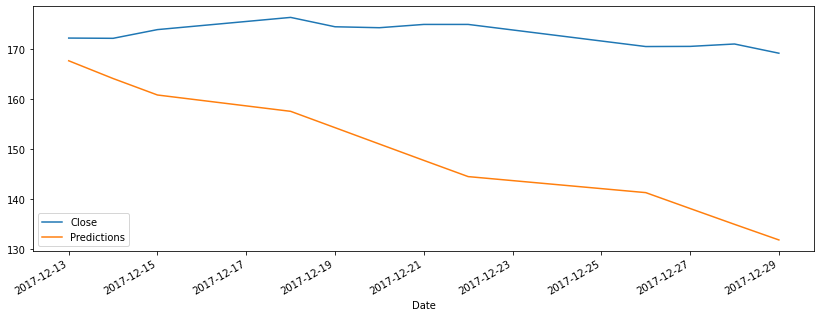

In [37]:
test.plot(figsize=(14,5))

In [38]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Close'],test['Predictions']))
print(rmse)

25.63597553220093
